<a href="https://colab.research.google.com/github/anujdutt9/Deep-Learning-TF-2.0/blob/master/TF_2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.1
import tensorflow as tf
tf.__version__

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.1`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


'2.1.0'

In [0]:
# Import Dataset
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [0]:
# Data is of type Bunch Object which is kind of like a Dictionary
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
# 'data.data' means the input data
data.data.shape

(569, 30)

In [0]:
# Labels: 'data.target'
data.target.shape

(569,)

In [0]:
# First 10 Labels
data.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
# Label Names
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
# Meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
# Train Test Split Dataset
from sklearn.model_selection import train_test_split

# Train Test Split using 80% data from training and 20% for validation
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

In [0]:
X_train.shape, y_train.shape

((455, 30), (455,))

In [0]:
X_test.shape, y_test.shape

((114, 30), (114,))

In [0]:
X_train[0]

array([1.356e+01, 1.390e+01, 8.859e+01, 5.613e+02, 1.051e-01, 1.192e-01,
       7.860e-02, 4.451e-02, 1.962e-01, 6.303e-02, 2.569e-01, 4.981e-01,
       2.011e+00, 2.103e+01, 5.851e-03, 2.314e-02, 2.544e-02, 8.360e-03,
       1.842e-02, 2.918e-03, 1.498e+01, 1.713e+01, 1.011e+02, 6.866e+02,
       1.376e-01, 2.698e-01, 2.577e-01, 9.090e-02, 3.065e-01, 8.177e-02])

In [0]:
# Normalize the Dataset
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance
# z = (x - mean)/ sd
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [0]:
# Build the Model for Classification
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(X_train.shape[1],)),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

# Print Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# Train the Model
hist = model.fit(x=X_train, y=y_train, batch_size=1, epochs=100, verbose=1, validation_data=(X_test, y_test))

Train on 455 samples, validate on 114 samples
Epoch 1/100
455/455 [==============================] - 1s 2ms/sample - loss: 0.2445 - accuracy: 0.9495 - val_loss: 0.1616 - val_accuracy: 0.9298
Epoch 2/100
455/455 [==============================] - 1s 1ms/sample - loss: 0.1257 - accuracy: 0.9758 - val_loss: 0.1348 - val_accuracy: 0.9386
Epoch 3/100
455/455 [==============================] - 1s 1ms/sample - loss: 0.0987 - accuracy: 0.9846 - val_loss: 0.1254 - val_accuracy: 0.9386
Epoch 4/100
455/455 [==============================] - 1s 1ms/sample - loss: 0.0866 - accuracy: 0.9868 - val_loss: 0.1193 - val_accuracy: 0.9561
Epoch 5/100
455/455 [==============================] - 1s 1ms/sample - loss: 0.0797 - accuracy: 0.9868 - val_loss: 0.1145 - val_accuracy: 0.9561
Epoch 6/100
455/455 [==============================] - 1s 1ms/sample - loss: 0.0746 - accuracy: 0.9868 - val_loss: 0.1113 - val_accuracy: 0.9561
Epoch 7/100
455/455 [==============================] - 1s 1ms/sample - loss: 0.0712 

In [0]:
# All the things you can plot for using Model Training History
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

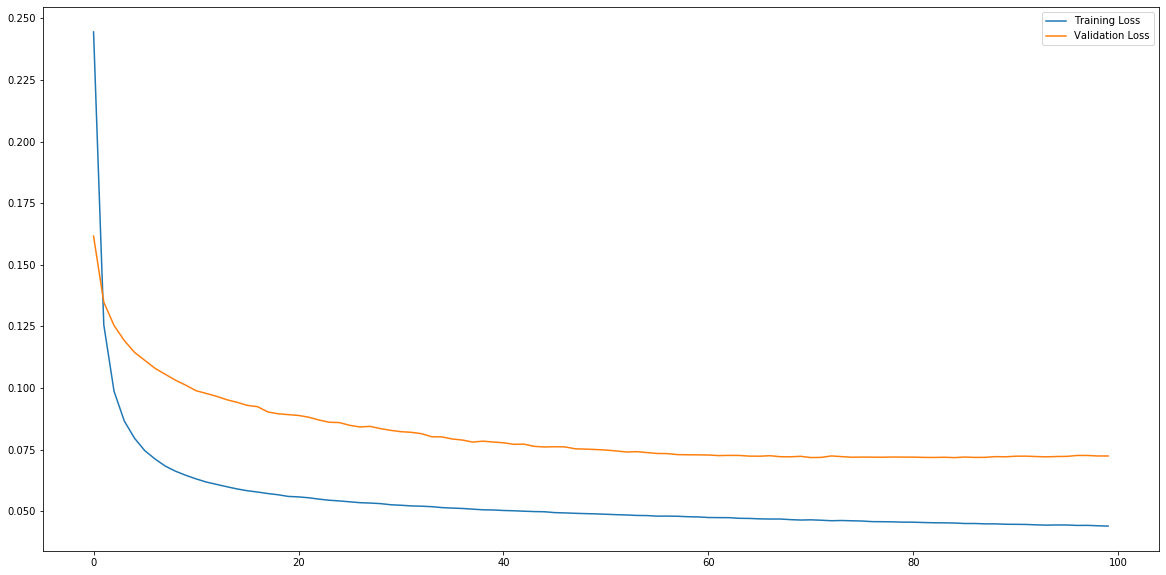

In [0]:
# Plot Model Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()

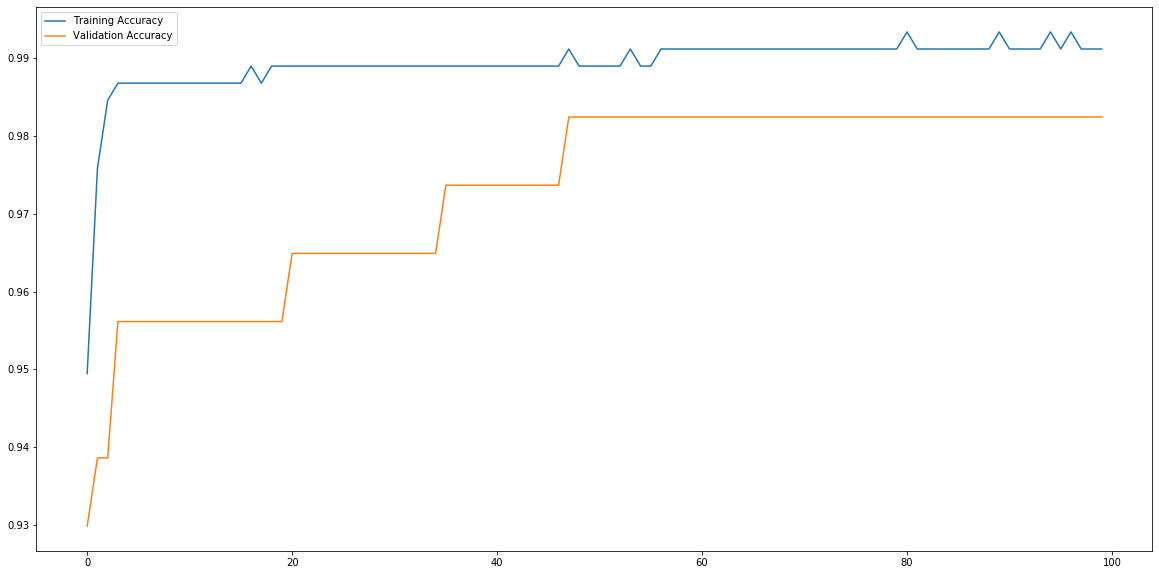

In [0]:
# Plot Model Accuracy
plt.figure(figsize=(20,10))
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

In [0]:
# Save Trained Model
model.save('./saved_model.h5', overwrite=True)
model.save_weights('./saved_model_weights.h5', overwrite=True)